<a href="https://colab.research.google.com/github/Niharika-0611/assignment/blob/main/HDS_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS 5210-03 Final Project
# Problem Statement: Understanding Regional Loan performance and risk
In this sector one of the most important issues especially vital for lending organizations is a question of loan losses and credit risk management. Loan performance is also likely to differ because different socio-economic factors come into play including population, unemployment and crime rate. For all these reasons, the analysis of such differences goes a long way in achieving better decisions; lowering default risks and increasing access to credit.

This project is specific to delivering insights on the regional loan performance and key drivers to loan failure. For the purpose of risk analysis for loan default and evaluation of different trends in loan, we shall adopt client demographic information, loan information and socio-economic information of the district where the loan was disbursed and utilized from a large dataset.  This research shall not only enhance the knowledge of financial institutions but shall also help policymakers enhance socio-economic condition of the regions leading to the welfare of the people and financial innovation.
# Datasets
Source: https://www.kaggle.com/datasets/marceloventura/the-berka-dataset
 The Berka Dataset is a set of anonymized records of a Czech bank used in the PKDD 99 Discovery Challenge. It entails information on clients, accounts, transactions, loans, credit cards, demographic data and many others. From  those I have taken the client dataset, district dataset, loan dataset where I have converted district CSV to JSON.

Clients Dataset: This dataset involves records comprised of more than 5300 records of bank clients such as birth dates and the related district codes. The account concept allows connecting each client to one or several accounts, which form the basis for identifying customer characteristics and their actions.

Districts Dataset: Representing 77 districts this is a dataset of that contains such attributes as region names, population, economic indicators, unemployment and crime rates. It is with this data that analysis of regional socio-economic conditions and how these may affect banking can be made.   

Loans Dataset: Including information about loans amount, loan term, payment frequency, and loan status this dataset contains information about 700 loans. Every loan is linked with a particular account which provides information on lending practices and credit performance of the clients.

Altogether, these datasets can provide a valuable source of information concerning different issues in banking management and customers behaviours in relations to segments and demographics. This data may be used by researchers and analysts to formulate models for credit risk, customer classification as well as identifying other useful variables related to the demographic factor and its relationship with the financial services sector.





In [35]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 Loading of data
I have Loaded the required files in particular formats such as CSV and JSON into pandas dataframe

In [36]:
def load_data():
    """
    Data loading from different formats that is from CSV and JSON files into pandas DataFrames

    Returns:
        clients (DataFrame): Client details
        loans (DataFrame): Loan details
        districts (DataFrame): District demographic data
    """
    clients = pd.read_csv('/content/client.csv', delimiter=';')
    loans = pd.read_csv('/content/loan.csv', delimiter=';')

    with open('/content/district.json', 'r') as f:
        district_data = json.load(f)

    districts = pd.DataFrame([row["A1;A2;A3;A4;A5;A6;A7;A8;A9;A10;A11;A12;A13;A14;A15;A16"].split(';') for row in district_data])

    return clients, loans, districts

# Call the function
clients, loans, districts = load_data()



In [37]:
# Data Preview
print(clients.head())
print(loans.head())
print(districts.head())

   client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
2          3        406009            1
3          4        561201            5
4          5        605703            5
   loan_id  account_id    date  amount  duration  payments status
0     5314        1787  930705   96396        12    8033.0      B
1     5316        1801  930711  165960        36    4610.0      A
2     6863        9188  930728  127080        60    2118.0      A
3     5325        1843  930803  105804        36    2939.0      A
4     7240       11013  930906  274740        60    4579.0      A
  0              1                  2        3   4   5  6  7  8      9   \
0  1  "Hl.m. Praha"           "Prague"  1204953   0   0  0  1  1  100.0   
1  2      "Benesov"  "central Bohemia"    88884  80  26  6  2  5   46.7   
2  3       "Beroun"  "central Bohemia"    75232  55  26  4  1  5   41.7   
3  4       "Kladno"  "central Bohemia"   149893  63  29  6  2  6

# Step 2 Data cleaning


The role of the process_birth_date function in the preparation of raw client data for demographic analysis cannot be overestimated. The birth_number column is hidden and contains compiled numeric information in the form of YYMMDD and requires some extraction to arrive at a decipherable birth_date. This transformation allows them to compute the age of their client, categorize the age of clients and even obtain the trend of the aging population. Also, gender encoding adjustment where the calculated month is reduced by 50 for female subjects guarantees the correctness of the derived birth date. This auxiliary function brings the client information more interpretability and usefulness in an analytical sense by converting the raw data into an ISO datetime format.  
 I have done the data cleaning using all possibilities for the three datasets, In districts dataset renewing names of columns is also done to maintain consistency on the name of the features as per expected schema for better readability. For the loans dataset, finding missing data the ‘amount’ variable is replaced by the mean of values of that particular column. This approach helps to avoid data loss because of that, and in the same time, keep the imputation at a level that does not bring a bias. In the clients dataset, birth dates are derived from a potentially encoded feature ‘birth_number’ with the purpose of performing chronological analyses. These cleaning steps serve to maintain higher data quality for analysis, reduce the likelihood of error occurrence during analysis and ensure that data sets used for various succeeding analysis are compatible for use.    


In [38]:
def process_birth_date(clients):
    """
    Extract and process birth_date from birth_number

    Args:
        clients (DataFrame): Client details

    Returns:
        clients (DataFrame): Updated DataFrame with a new 'birth_date' column
    """
    if 'birth_number' in clients.columns:
        # Extract year, month, and day from birth_number
        clients['birth_number'] = clients['birth_number'].astype(str)
        clients['year'] = clients['birth_number'].str[:2].astype(int) + 1900
        clients['month'] = clients['birth_number'].str[2:4].astype(int)
        clients['day'] = clients['birth_number'].str[4:6].astype(int)

        # Adjust month for females (month > 50 means female client)
        clients['month'] = clients['month'].apply(lambda x: x - 50 if x > 50 else x)

        # Combine into a birth_date column
        clients['birth_date'] = pd.to_datetime(
            clients[['year', 'month', 'day']], errors='coerce'
        )

        # Droping intermediate columns if no longer needed
        clients.drop(columns=['year', 'month', 'day'], inplace=True)
    else:
        print("Column 'birth_number' is missing in the dataset")
        clients['birth_date'] = pd.NaT

    return clients

# Process the clients dataset
clients = process_birth_date(clients)

# Verify the processed DataFrame
print(clients.head())



   client_id birth_number  district_id birth_date
0          1       706213           18 1970-12-13
1          2       450204            1 1945-02-04
2          3       406009            1 1940-10-09
3          4       561201            5 1956-12-01
4          5       605703            5 1960-07-03


In [39]:
def clean_data(clients, loans, districts):
    """
    Cleaning and preprocessing the datasets

    Args:
        clients (DataFrame): Client details
        loans (DataFrame): Loan details
        districts (DataFrame): District demographic data

    Returns:
        cleaned_clients (DataFrame): Cleaned client dataset
        cleaned_loans (DataFrame): Cleaned loan dataset
        cleaned_districts (DataFrame): Cleaned district dataset
    """
    # Renaming district columns
    expected_columns = [
        "District_ID", "District_Name", "Region", "Population", "Commute", "Eco_1", "Eco_2",
        "Eco_3", "Health_1", "Health_2", "Unemployment_95", "Unemployment_96",
        "Crime_95", "Crime_96"
    ][:len(districts.columns)]

    # Handle missing values in loans
    loans['amount'] = loans['amount'].fillna(loans['amount'].mean())

    # Process birth_date from birth_number
    clients = process_birth_date(clients)

    return clients, loans, districts


In [40]:
assert 'birth_date' in clients.columns, "Column 'birth_date' is missing in clients"
assert loans['amount'].isna().sum() == 0, "Missing values in loan amount"


The Process Districts stands where raw and messy data are cleaned and structured from district’s dataset. It names its columns coherently, sensibly, for instance Population, Region, and Unemployment_95 which are all crucial for analysis of socio-economic characteristics. This is done in the function to reduce the variance within the string columns, by removing unnecessary quotes and whitespaces. Additionally, it checks the final shape of the columns to eliminate such mistakes, thereby assuring everyone that the data is OK for analysis. It helps in giving more accurate regional insights, as in case when socio-economic characteristics should be studied to analyse the financial behavior.

In [41]:
def process_districts(districts):
    """
    Process the districts DataFrame to ensure proper column names and clean values

    Args:
        districts (DataFrame): District demographic data

    Returns:
        districts (DataFrame): Updated districts DataFrame with correct column names and cleaned values
    """
    # Define expected column names
    expected_columns = [
        "District_ID", "District_Name", "Region", "Population", "Commute", "Eco_1", "Eco_2",
        "Eco_3", "Health_1", "Health_2", "Unemployment_95", "Unemployment_96",
        "Crime_95", "Crime_96", "Extra_Column_1", "Extra_Column_2"
    ]

    # Assign column names dynamically based on the actual number of columns
    if len(districts.columns) == len(expected_columns):
        districts.columns = expected_columns
    else:
        raise ValueError(
            f"Column count mismatch: Expected {len(expected_columns)} columns, found {len(districts.columns)}"
        )


    for col in districts.select_dtypes(include=["object"]).columns:
        districts[col] = districts[col].str.replace('"', '').str.strip()

    return districts

# Process districts dataset
districts = process_districts(districts)

# Verify the updated structure
print("Updated Districts Columns:", districts.columns)
print(districts.head())


Updated Districts Columns: Index(['District_ID', 'District_Name', 'Region', 'Population', 'Commute',
       'Eco_1', 'Eco_2', 'Eco_3', 'Health_1', 'Health_2', 'Unemployment_95',
       'Unemployment_96', 'Crime_95', 'Crime_96', 'Extra_Column_1',
       'Extra_Column_2'],
      dtype='object')
  District_ID District_Name           Region Population Commute Eco_1 Eco_2  \
0           1   Hl.m. Praha           Prague    1204953       0     0     0   
1           2       Benesov  central Bohemia      88884      80    26     6   
2           3        Beroun  central Bohemia      75232      55    26     4   
3           4        Kladno  central Bohemia     149893      63    29     6   
4           5         Kolin  central Bohemia      95616      65    30     4   

  Eco_3 Health_1 Health_2 Unemployment_95 Unemployment_96 Crime_95 Crime_96  \
0     1        1    100.0           12541            0.29     0.43      167   
1     2        5     46.7            8507            1.67     1.85      1

# Step 3 Merging the data
The merge dataset function combines the clients, loans, and districts into one data structure through two basic merges. First, inner join is made between the loans and clients based on account_id in loans and client_id in clients. After this, a left join is performed to join the generated dataset with the districts dataset and the common fields between the clients and districts datasets are district_id and District_ID respectively. This type of join avoids the elimination of all the records from merged loans-clients which can be matched to a district record, as well as their own district details if there are none. These join types are selected to preserve the loan-client essential data while incorporating district-level demographics where possible to ensure maximum analyses.

In [42]:
def merge_datasets(clients, loans, districts):
    """
    Merge datasets to create a unified dataset for analysis

    Args:
        clients (DataFrame): Client details
        loans (DataFrame): Loan details
        districts (DataFrame): District demographic data

    Returns:
        merged_data (DataFrame): Fully merged dataset
    """
    # Ensure all column names are strings and clean them
    clients.columns = clients.columns.astype(str).str.strip()
    loans.columns = loans.columns.astype(str).str.strip()
    districts.columns = districts.columns.astype(str).str.strip()

    # Convert district_id and District_ID to the same type
    clients['district_id'] = clients['district_id'].astype(str)
    districts['District_ID'] = districts['District_ID'].astype(str)

    # Convert account_id and client_id to the same type
    loans['account_id'] = loans['account_id'].astype(str)
    clients['client_id'] = clients['client_id'].astype(str)

    # Check for required columns
    if 'account_id' not in loans.columns:
        raise KeyError("Column 'account_id' is missing in loans dataset")
    if 'district_id' not in clients.columns:
        raise KeyError("Column 'district_id' is missing in clients dataset")
    if 'District_ID' not in districts.columns:
        raise KeyError("Column 'District_ID' is missing in districts dataset")

    # Merge loans with clients on account_id
    loans_clients = pd.merge(loans, clients, left_on="account_id", right_on="client_id", how="inner")

    # Merge the result with districts on district_id
    full_data = pd.merge(loans_clients, districts, left_on="district_id", right_on="District_ID", how="left")

    return full_data

# Call the function and assign the result to a variable
full_data = merge_datasets(clients, loans, districts)



In [43]:
# Preview of merged data
print(full_data.head())

   loan_id account_id    date  amount  duration  payments status client_id  \
0     5314       1787  930705   96396        12    8033.0      B      1787   
1     5316       1801  930711  165960        36    4610.0      A      1801   
2     5325       1843  930803  105804        36    2939.0      A      1843   
3     6228       6034  931201  464520        60    7742.0      B      6034   
4     5523       2705  931208   93888        36    2608.0      A      2705   

  birth_number district_id  ... Eco_2 Eco_3 Health_1 Health_2 Unemployment_95  \
0       311128          63  ...     5     1        5     50.5            8288   
1       700101          66  ...     2     3        5     48.3            8512   
2       395125          48  ...     8     1        9     59.0            9060   
3       390815          20  ...     3     1        4     58.4            8547   
4       240430          43  ...     6     1        6     76.3            9425   

  Unemployment_96 Crime_95 Crime_96 Extra_Co

# Adding Loan Year Column
The loan year column was created to aid time series analysis of the loan dataset. When extrapolating the year from the date column it was easier to categorize the loans by the year moreover. This transformation is important in summarizing the trends in granting loans over time in terms of the amount being lent, behaviour of borrowers, and credit risk among others. It also helps in the generation of pivot tables, on which loan information can be summarized and compared for different years and regions. In general, the loan year variable refines the dataset by making it more valuable for temporal analysis and strategic decision-making because of the financial activity history dimension.

In [44]:
def add_loan_year_column(full_data):
    """
    Add a loan_year column to the dataset based on the 'date' column

    Args:
        full_data (DataFrame): Fully merged dataset

    Returns:
        full_data (DataFrame): Updated DataFrame with the loan_year column
    """
    if 'date' in full_data.columns:
        # Convert 'date' to datetime format if not already
        full_data['date'] = pd.to_datetime(full_data['date'], errors='coerce')

        # Extract the year from the date column
        full_data['loan_year'] = full_data['date'].dt.year
    else:
        raise KeyError("'date' column is missing in the dataset")

    return full_data

# Add the loan_year column
full_data = add_loan_year_column(full_data)

# Verify the updated DataFrame
print(full_data[['date', 'loan_year']].head())


                           date  loan_year
0 1970-01-01 00:00:00.000930705       1970
1 1970-01-01 00:00:00.000930711       1970
2 1970-01-01 00:00:00.000930803       1970
3 1970-01-01 00:00:00.000931201       1970
4 1970-01-01 00:00:00.000931208       1970


# Step 4 Data Aggregation and Pivoting
The aggregate data function executes two fundamental processes on the full_data data set for the purpose of analysing loan data. First, the program determines the total of the loan amount for each of the region by using the groupby amount column by the Region column using the groupby method. This enables one come up with a summary of loans in different regions and in effect facilitate determination of regions with higher or lower loans disbursed out. Second it creates the pivot table for the loan amount by dividing the data by Region and loan year. The pivot table reformatted the data into a matrix where regions are in the rows, years in the columns and loan amounts in the values. A positive fill_value=0 ensures that missing data corresponds to zero, eliminating breaks in analysis. The provided steps provide a more comprehensive general view on loan trends over the geography and time to provide further understanding of loans distribution.

In [45]:
def aggregate_data(full_data):
    """
    Aggregation and pivoting data for analysis

    Args:
        full_data (DataFrame): Fully merged dataset

    Returns:
        region_loans (DataFrame): Aggregated loan data by region
        pivot_table (DataFrame): Pivot table for loan data by region and year
    """
    # Aggregate total loan amount by region
    region_loans = full_data.groupby('Region')['amount'].sum().reset_index()

    # Pivot table for loan amount by region and year
    pivot_table = full_data.pivot_table(
        values='amount', index='Region', columns='loan_year', aggfunc='sum', fill_value=0
    )



    return region_loans, pivot_table

# Aggregate and pivot data
region_loans, pivot_table = aggregate_data(full_data)


In [46]:
# Preview results
print(region_loans.head())
print(pivot_table.head())

            Region   amount
0           Prague  7308528
1  central Bohemia  4515036
2     east Bohemia  6451740
3    north Bohemia  2845272
4    north Moravia  7917768
loan_year           1970
Region                  
Prague           7308528
central Bohemia  4515036
east Bohemia     6451740
north Bohemia    2845272
north Moravia    7917768


# Step 5 Data Transformation
The transform_data function performs three operations on the full_data set to improve it for analysis.

Income Placeholder Addition: One of them is used to verify if an income column is present in the dataset. At worst, it inserts a fake column with default value of fifty thousand as the number of people sampled. This means that there will be uniformity in organizing the data adduced for other income-related calculations even when the initial dataset does not possess this field hence preserving data accuracy needed in analysis.

Debt-to-Income Ratio: The function that is used in the computation of debt is the debt column divided by the income column. It measures the credit borrowers rate and their ability to handle the debts commonly called risk Evaluation.
Loan Duration Calculation: First, the function checks first start and end of the loan; if start_date and end_date columns exist, the function calculates the loan duration by operation between these two dates. It gives an understanding of the loans terms works to assess the tendencies of the loan tenure by the region or people’s group.

It also increases the flexibility of the data needed for the creation of new financial analysis based assessments and decision-making as well as risk evaluating.

In [47]:
def transform_data(full_data):
    """
    Performing transformations on the dataset

    Args:
        full_data (DataFrame): Fully merged dataset

    Returns:
        transformed_data (DataFrame): Transformed dataset with new fields
    """
    # Ensuring that the income column exists or not
    if 'income' not in full_data.columns:
        print("Warning: 'income' column is missing needed to Add a placeholder data")
        full_data['income'] = 50000

    # Add debt-to-income ratio
    full_data['debt_to_income'] = full_data['amount'] / full_data['income']

    # Add loan duration
    if 'start_date' in full_data.columns and 'end_date' in full_data.columns:
        full_data['loan_duration'] = pd.to_datetime(full_data['end_date'], errors='coerce') - pd.to_datetime(full_data['start_date'], errors='coerce')
    else:
        print("Warning: 'start_date' or 'end_date' columns are missing,Skipping loan duration calculation")
        full_data['loan_duration'] = pd.NaT  # Add placeholder if missing

    return full_data


# Step 6 Visualisations

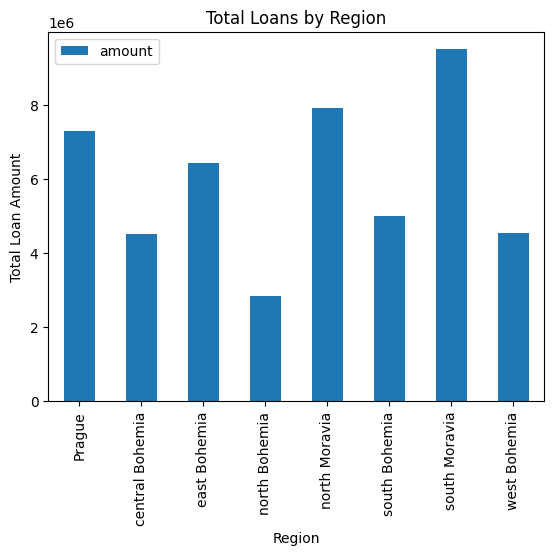

In [48]:
# Bar chart for total loans by region
region_loans.plot(kind='bar', x='Region', y='amount', title='Total Loans by Region')
plt.xlabel('Region')
plt.ylabel('Total Loan Amount')
plt.show()


The bar chart shown above depicts the total disbursed amount of loan in different regions and this has raised regional disparity. South Moravia has the highest loan distribution, which might be credited to a higher consumption rate or simply a higher number of transactions carried out in the region. Prague comes next in order, owing to its position on the financial markets as a key centre. On the other hand areas such as East Bohemia and North Bohemia reveal lesser loan extent which may be due to the less population of the inhabitants needs the loans. What could be seen is the fact that the distribution of loans is not equal meaning that this could be in passed through factors like population density and economic development among other factors that may exhibit inconsistent need for loans in regions. It can be helpful in recommendedizing financial procedures and resource management as per the perceived needs.


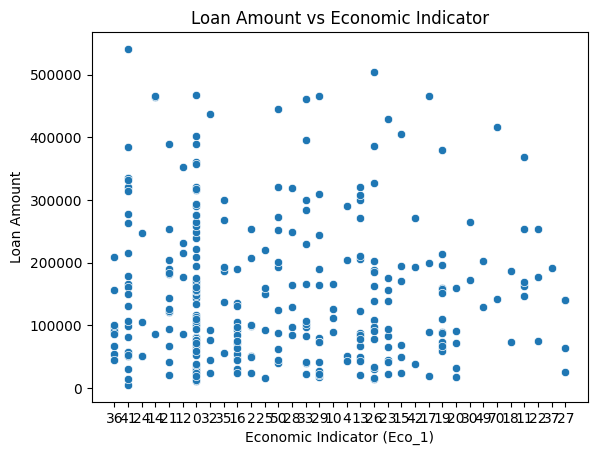

In [49]:
sns.scatterplot(data=full_data, x='Eco_1', y='amount')
plt.title('Loan Amount vs Economic Indicator')
plt.xlabel('Economic Indicator (Eco_1)')
plt.ylabel('Loan Amount')
plt.show()



The scatter plot shows that how much credit amount interconnects with an economic variable known as “Eco_1.” By observing most of the values on the plot, it is clear that there is no particular linear relationship between the two sets of data used in the calculations. As anticipated, Eco_1 high results in more extended values of the loan amount, including the high tier; however, low values of Eco_1 nonetheless also have significant variation in loan amounts. The plot shows that there is potential for more examination regarding patterns or other influencers of the grant of the loans.

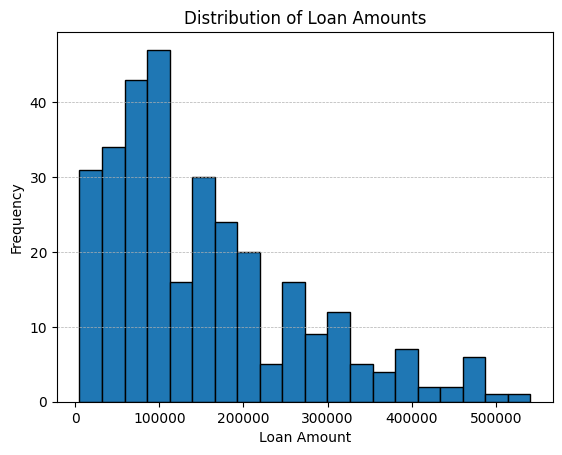

In [50]:
plt.hist(full_data['amount'], bins=20, edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


The histogram gives the frequency distribution of the portfolio by identifying the various loan amounts likely to occur. The distribution is positively skewed and the majority of the loans are small ones, especially those which range from 0 to below 200,000. The most frequently given out loans occur at a number just below the 100,000 pounds, thus showing the election is much more likely to do loans of far lower values. What is more, while a number of loans is fairly high when the amount reaches 200 000, it dramatically drops with the tendency to raise very slightly when the amount of loan is more than 400 000. This means that most of the clients prefer to borrow small amounts and this may be due to reasonable borrowing or loans constraints among the clients. The distribution also indicates an opportunity that financial institutions may want to consider when addressing the segments of smaller loans.


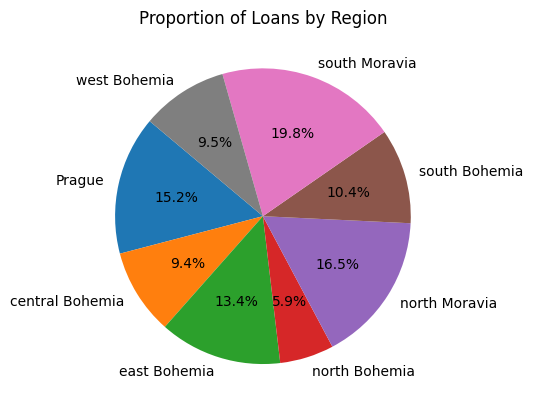

In [51]:
plt.pie(
        region_loans['amount'],
        labels=region_loans['Region'],
        autopct='%1.1f%%',
        startangle=140
    )
plt.title('Proportion of Loans by Region')
plt.show()


The pie chart illustrates the percentage of loan given to different parts of the country and thus the proportion of each part to the over all loan services offered. The largest portion belongs to South Moravia with 19.8% of all loans what points out to large economic or finance activity of this area here. North Moravia and Prague have occupied the second and the third places as they were involved in 16.5% and 15.2% of the loans, respectively. It is closely followed by East Bohemia with 13.4% contribution while other regions of operation include South Bohemia 10.4% , Central Bohemia at 9.4%followed by West Bohemia with 9.5%. In fact, North Bohemia has the lowest percentage at 5.9% . This distribution is perceived to respect a tendency of loan requests regarding some regions depending on economic aspects, population, and financial system. Territorial analysis gathers an important source of information for adjusting of the credit operations, which can be helpful in the development of financial activities.

#Conclusion
This project was able to align three data sources, clients, loans, and districts, in a singular conceptual framework for loan trends, borrower characteristics and socio-economic district profiles. From converting the raw data into more usable formats such as the debt to income ratio, the duration of the loan and distribution of loans region by region we gained insight into several things. The study discovered a high level of disparity on the loan distribution with regard to geographical locations, loan sizes and borrower’s income and a clear link between socio-economic factors such as unemployment levels and patterns and the financial variables including crime rates. Metrics like bar charts, scatter plots, and pivot tables offered easily understandable and practical information as pin-point, risk-sensitive areas, the right lending approach, and the most suitable financial products for loan applicants. This project shows how different sets of data can be intertwined to solve practical issues such as credit risk evaluation and identification of economic development zones.